In [ ]:
%matplotlib widget

In [1]:
import pandas as pd
import numpy as np

# Load CSV Files

In [2]:
dataset1 = pd.read_csv("dataset/Challenger_Ranked_Games.csv")
dataset2 = pd.read_csv("dataset/GrandMaster_Ranked_Games.csv")
dataset3 = pd.read_csv("dataset/Master_Ranked_Games.csv")

# Combine CSV Files

In [3]:
mergeddataset = pd.concat([dataset1,dataset2,dataset3])
mergeddataset.reset_index(drop=True)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199920,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
199921,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
199922,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
199923,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


We will Delete games which is less than 300 seconds.

In [4]:
mergeddataset = mergeddataset[~(mergeddataset["gameDuraton"] <1200)]

we will apply reduntant features technic for 8 columns they will convert to binary presentiotan in 6 column
B = 0, R = 1
- (blueWins, redWins) ->winner
- (blueFirstBlood, redFirstBlood) -> firstBlood
- (blueFirstInhibitor, redFirstInhibitor) -> firstInhibtor 
- (blueFirstBaron, redFirstBaron) -> firstBaron
- (blueFirstDragon, redFirstDragon) -> firstDragon
- (blueFirstTower, redFirstTower) -> firstTower
- (redTotalLevel, redAvgLevel) -> redAvgLevel
- (blueTotalLevel,  blueAvgLevel) -> blueAvgLevel

In [5]:
for x in ['redWins', 'redFirstBlood', 'redFirstInhibitor', 'redFirstBaron', 'redFirstDragon', 'redFirstTower', 'gameId', 'redAvgLevel', 'blueAvgLevel']:
    del mergeddataset[x]

X_scaled

In [6]:
Y = mergeddataset["blueWins"].values
del mergeddataset["blueWins"]
X = mergeddataset.values

In [7]:
X_columns = mergeddataset.columns

normalize data

In [8]:
from sklearn import preprocessing
X = mergeddataset.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# functions

In [9]:
from sklearn.metrics import mean_squared_error
from time import time
def test_model_avg(model_init_func, model_run_func, X_test, y_test, title="Results", simulation_count=5):
    print(f"{title:^110}")
    print("{:<10}{:<40}{:<40}{:<40}".format("#", "Training Time (ms)", "Error (cost)", "Score (%)"))
    print(f"{'-'*110:^110}")
    times = []
    costs = []
    models = []
    scores = []
    for x in range(simulation_count):
        clf = model_init_func()
        start = time()
        model_run_func(clf)
        stop = time()
        y_pred = clf.predict(X_test)
        training_time = stop - start
        error_cost = mean_squared_error(y_test, y_pred)
        score = clf.score(X_test, y_test)
        times += [training_time]
        costs += [error_cost]
        models += [clf]
        scores += [score]
        print(f"{x+1:<10}{training_time * 1000:<40.2f}{error_cost:<40.6f}{score:<40.4f}")
    print(f"{'-'*110:^110}")
    print(f"{'Average':<10}{sum(times)/len(times) * 1000:<40.2f}{sum(costs)/len(costs):<40.6f}{sum(scores)/len(scores):<40.4f}")
    return models

In [10]:
def average_feature_importance(models_features, extract_future_func):
    return list(sorted(list(enumerate(list(map(lambda x: sum(x)/len(models),zip(*map(extract_future_func,models)))))), key=lambda i:i[1], reverse=True))

In [11]:
def calculate_feature_importance(features):
    features = list(features)
    class_1_feature_list = sorted(filter(lambda x: x[1] > 0,features), key=lambda i:i[1], reverse=True)
    class_0_feature_list = sorted(filter(lambda x: x[1] < 0,features),key=lambda i:i[1])
    return class_0_feature_list, class_1_feature_list

In [12]:
import matplotlib.pyplot as plt
def visualize_feature_importance(class_0_feature_list, class_1_feature_list, column_names, feature_count=3, class_count=2):
    fig, axis = plt.subplots(1,class_count)
    fig.tight_layout()
    if not isinstance(axis , np.ndarray):
        axis = [axis]
    fig.set_size_inches((2*class_count) * feature_count, 6)
    fC = list(range(0,feature_count))
    for bar in zip(axis, [class_0_feature_list[:feature_count], class_1_feature_list[:feature_count]], range(class_count)):
        bar[0].set_title(f"Class {bar[2]} Weight Importance")
        bar[0].set_xticks(fC)
        bar[0].set_xticklabels(list(map(lambda x: column_names[x[0]],bar[1])))
        bar[0].bar(fC, list(map(lambda x: abs(x[1]),bar[1])))
    return fig

In [13]:
import matplotlib.pyplot as plt
def visualize_decision_boundary(clf, f1, f2, X_train, y_train, X_test, y_test, X_columns):
    coef = clf.coef_
    c = clf.classes_[0]
    intercept = clf.intercept_
    def line(x0):
      return (-(x0 * coef[c, f1]) - intercept[c]) / coef[c, f2]
    fig, (train_plt, test_plt) = plt.subplots(1, 2)
    fig.tight_layout()
    train_plt.plot(X_train[y_train==0,f1], X_train[y_train==0,f2], 'rx', label='Class0')
    train_plt.plot(X_train[y_train==1,f1], X_train[y_train==1,f2], 'bo', label='Class1')
    train_plt.set_title("Train Data")
    train_plt.set_xlabel(X_columns[f1])
    train_plt.set_ylabel(X_columns[f2])
    test_plt.plot(X_test[y_test==0,f1], X_test[y_test==0,f2], 'rx', label="Class0")
    test_plt.plot(X_test[y_test==1,f1], X_test[y_test==1,f2], 'bo', label="Class1")
    xmin, xmax = test_plt.get_xlim()
    ymin, ymax = test_plt.get_ylim()
    test_plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color="black", label="hypothesis")
    test_plt.set_title("Test Data")
    test_plt.set_xlabel(X_columns[f1])
    test_plt.set_ylabel(X_columns[f2])
    train_plt.legend()
    test_plt.legend()
    return fig

In [14]:
from sklearn.inspection import permutation_importance
def sckit_permutation_importance(clf,X,y):
    return permutation_importance(clf, X, y).importances_mean

def coef_permutation_importance(x):
    return x.coef_[0]


In [15]:
def print_error_and_ms(ms, error):
    print(f"Average Training Time {ms}, Average Error Cost {error}")
    

## split train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.7) 

# 3. Linear Classification

## 3.1 Perceptron

### 3.1.1 test with default parameters

In [17]:
from sklearn.linear_model import Perceptron
models = test_model_avg(lambda: Perceptron(), lambda x: x.fit(X_train, y_train), X_test, y_test, "Linear Classification : Perceptron Results")

                                  Linear Classification : Perceptron Results                                  
#         Training Time (ms)                      Error (cost)                            Score (%)                               
--------------------------------------------------------------------------------------------------------------
1         264.48                                  0.012577                                0.9874                                  
2         269.16                                  0.012577                                0.9874                                  
3         264.87                                  0.012577                                0.9874                                  
4         525.65                                  0.012577                                0.9874                                  
5         422.21                                  0.012577                                0.9874                           

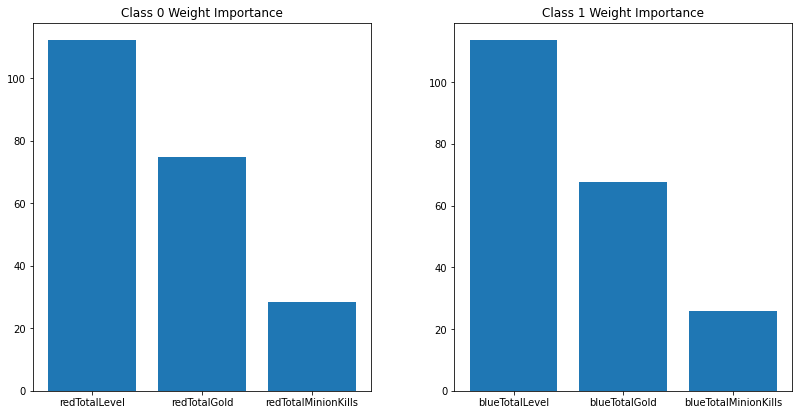

In [18]:
feature_importances = average_feature_importance(models, lambda x: x.coef_[0])
class_0_feature_list, class_1_feature_list = calculate_feature_importance(feature_importances)
visualize_feature_importance(class_0_feature_list, class_1_feature_list, X_columns)
None

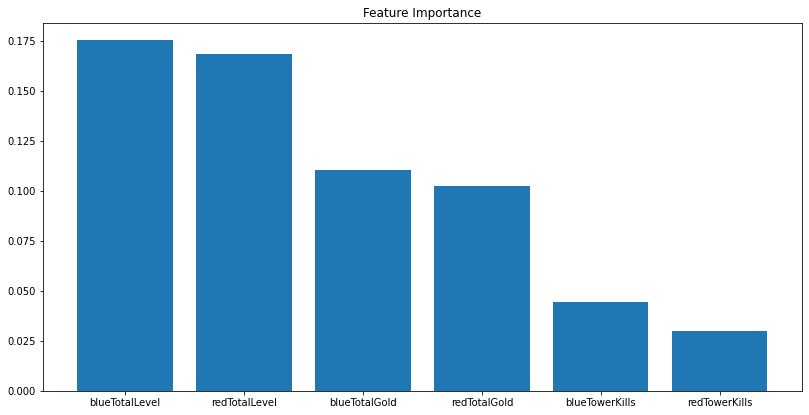

In [19]:
feature_importances = average_feature_importance(models, lambda x: sckit_permutation_importance(x,X_test,y_test))
fig = visualize_feature_importance(feature_importances, [], X_columns, 6, 1)
plt.title("Feature Importance")
None

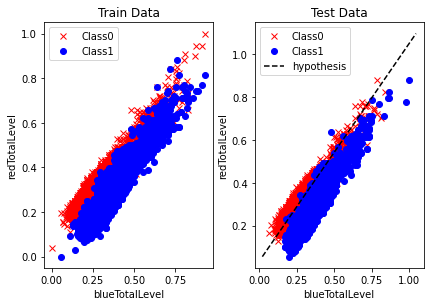

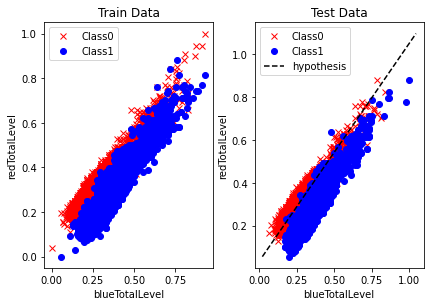

In [20]:
visualize_decision_boundary(models[0], feature_importances[0][0], feature_importances[1][0], X_train, y_train, X_test, y_test, X_columns)

## 3.2 Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
models = test_model_avg(lambda: LogisticRegression(max_iter=10000), lambda x: x.fit(X_train, y_train), X_test, y_test, "Linear Classification : LogisticRegression Results")

                              Linear Classification : LogisticRegression Results                              
#         Training Time (ms)                      Error (cost)                            Score (%)                               
--------------------------------------------------------------------------------------------------------------
1         1638.06                                 0.014221                                0.9858                                  
2         1589.13                                 0.014221                                0.9858                                  
3         1476.58                                 0.014221                                0.9858                                  
4         1380.50                                 0.014221                                0.9858                                  
5         1346.96                                 0.014221                                0.9858                           

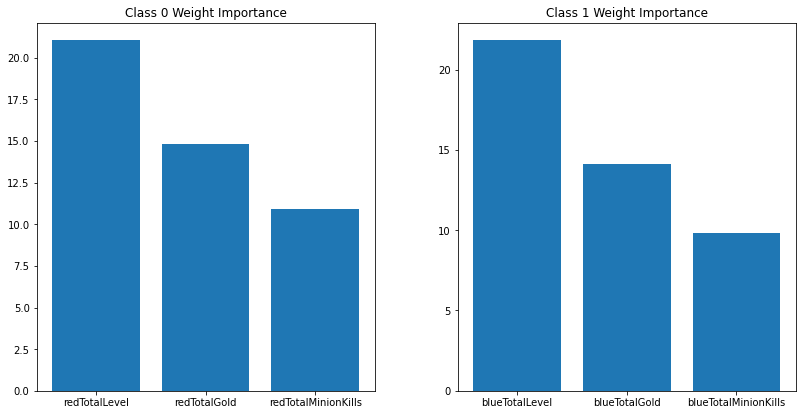

In [22]:
feature_importances = average_feature_importance(models, lambda x: x.coef_[0])
class_0_feature_list, class_1_feature_list = calculate_feature_importance(feature_importances)
visualize_feature_importance(class_0_feature_list, class_1_feature_list, X_columns)
None

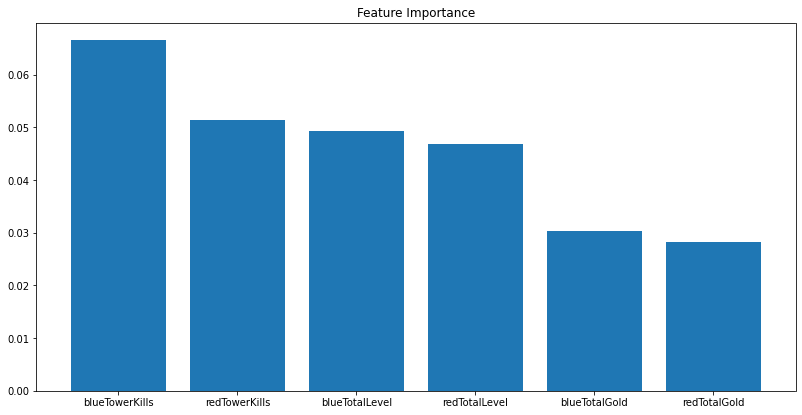

In [23]:
feature_importances = average_feature_importance(models, lambda x: sckit_permutation_importance(x,X_test,y_test))
fig = visualize_feature_importance(feature_importances, [], X_columns, 6, 1)
plt.title("Feature Importance")
None

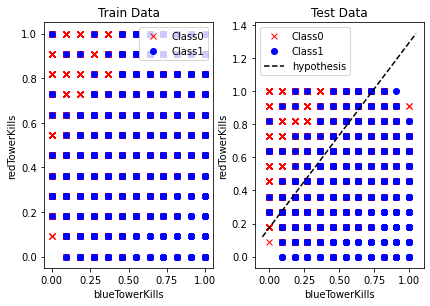

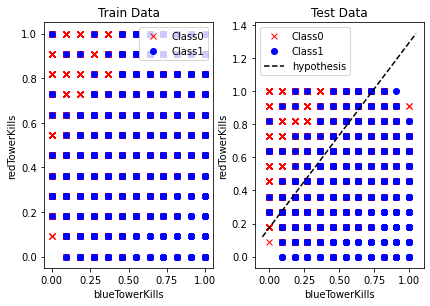

In [24]:
visualize_decision_boundary(models[0], feature_importances[0][0], feature_importances[1][0], X_train, y_train, X_test, y_test, X_columns)

## 3.3 SGDClassifier

In [25]:
from sklearn.linear_model import SGDClassifier
models = test_model_avg(lambda: SGDClassifier(), lambda x: x.fit(X_train, y_train), X_test, y_test, "Linear Classification : SGDClassifier Results")

                                Linear Classification : SGDClassifier Results                                 
#         Training Time (ms)                      Error (cost)                            Score (%)                               
--------------------------------------------------------------------------------------------------------------
1         222.10                                  0.016865                                0.9831                                  
2         212.04                                  0.016984                                0.9830                                  
3         228.62                                  0.016675                                0.9833                                  
4         211.89                                  0.016627                                0.9834                                  
5         224.77                                  0.016722                                0.9833                           

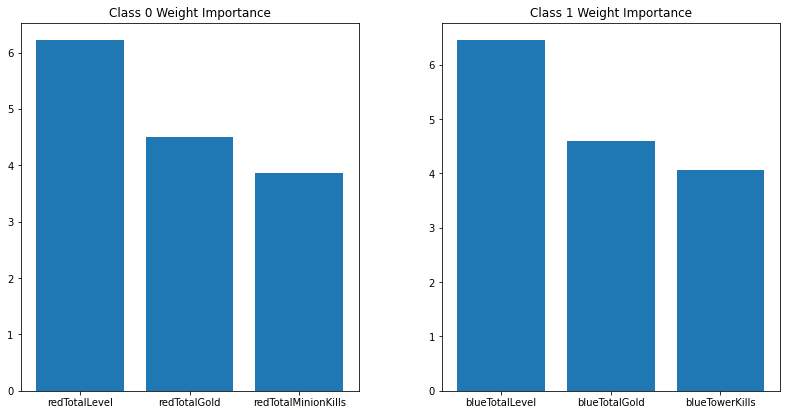

In [26]:
feature_importances = average_feature_importance(models, lambda x: x.coef_[0])
class_0_feature_list, class_1_feature_list = calculate_feature_importance(feature_importances)
visualize_feature_importance(class_0_feature_list, class_1_feature_list, X_columns)
None

In [27]:
feature_importances = average_feature_importance(models, lambda x: sckit_permutation_importance(x,X_test,y_test))
fig = visualize_feature_importance(feature_importances, [], X_columns, 6, 1)
plt.title("Feature Importance")
None

KeyboardInterrupt: 

In [ ]:
visualize_decision_boundary(models[0], feature_importances[0][0], feature_importances[1][0], X_train, y_train, X_test, y_test, X_columns)

# 4 Neural Network-based Classification

## 4.1 MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
models = test_model_avg(lambda: MLPClassifier(), lambda x: x.fit(X_train, y_train), X_test, y_test, "Neural Network-based Classification : MLPClassifier Results", simulation_count=1)

In [ ]:
feature_importances = average_feature_importance(models, lambda x: sckit_permutation_importance(x,X_test,y_test))
fig = visualize_feature_importance(feature_importances, [], X_columns, 6, 1)
plt.title("Feature Importance")
None

# 5 Clustering

## 5.1 Clustering

In [ ]:
from sklearn.cluster import KMeans
models = test_model_avg(lambda: KMeans(n_clusters=2), lambda x: x.fit(X_train, y_train), X_test, y_test, "Clustering : KMeans Results")

In [ ]:
feature_importances = average_feature_importance(models, lambda x: sckit_permutation_importance(x,X_test,y_test))
fig = visualize_feature_importance(feature_importances, [], X_columns, 6, 1)
plt.title("Feature Importance")
None

#### 